<a href="https://colab.research.google.com/github/TAUforPython/Graph-MachineLearning/blob/main/Graph%20from%20DataFrame%20tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/digailab/awesome-hyperbolic-graph-learning

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# Load dataset

In [4]:
!wget -O red_green_overlay.csv 'https://github.com/TAUforPython/machinelearning/raw/refs/heads/main/test_datasets/df_red_green_overlay.csv'

--2025-10-04 17:15:27--  https://github.com/TAUforPython/machinelearning/raw/refs/heads/main/test_datasets/df_red_green_overlay.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TAUforPython/machinelearning/refs/heads/main/test_datasets/df_red_green_overlay.csv [following]
--2025-10-04 17:15:27--  https://raw.githubusercontent.com/TAUforPython/machinelearning/refs/heads/main/test_datasets/df_red_green_overlay.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43208 (42K) [text/plain]
Saving to: ‘df_red_green_overlay.csv’

df_red_green_overla 100%[===================>]  42.20K  --.-KB/s    in 

In [5]:
df = pd.read_csv('df_red_green_overlay.csv')

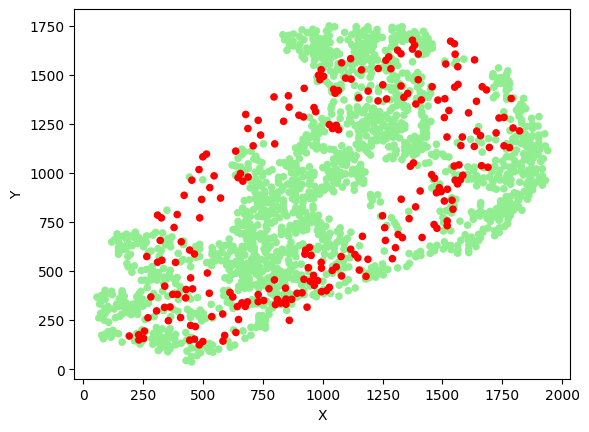

In [9]:
df.plot.scatter(x='X', y='Y', c=df['Color'].map({'light_green': 'lightgreen', 'red': 'red'}))
plt.show()

# t-SNE and RandomForestClassifier

Dataset shape: (1672, 4)

First few rows:
     X   Y        Color   Type
0  453  37  light_green  cross
1  430  44  light_green  cross
2  452  64  light_green  cross
3  476  69  light_green  cross
4  490  84  light_green  cross

Value counts for Type:
Type
cross    1445
point     227
Name: count, dtype: int64

Value counts for Color:
Color
light_green    1445
red             227
Name: count, dtype: int64

Features shape: (1672, 2)
Labels shape: (1672,)

Training set size: 1170
Testing set size: 502

Applying t-SNE...

Training classifier on t-SNE features...

Accuracy: 0.8127

Classification Report:
              precision    recall  f1-score   support

       cross       0.86      0.94      0.90       434
       point       0.00      0.00      0.00        68

    accuracy                           0.81       502
   macro avg       0.43      0.47      0.45       502
weighted avg       0.74      0.81      0.78       502


Confusion Matrix:
[[408  26]
 [ 68   0]]


/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


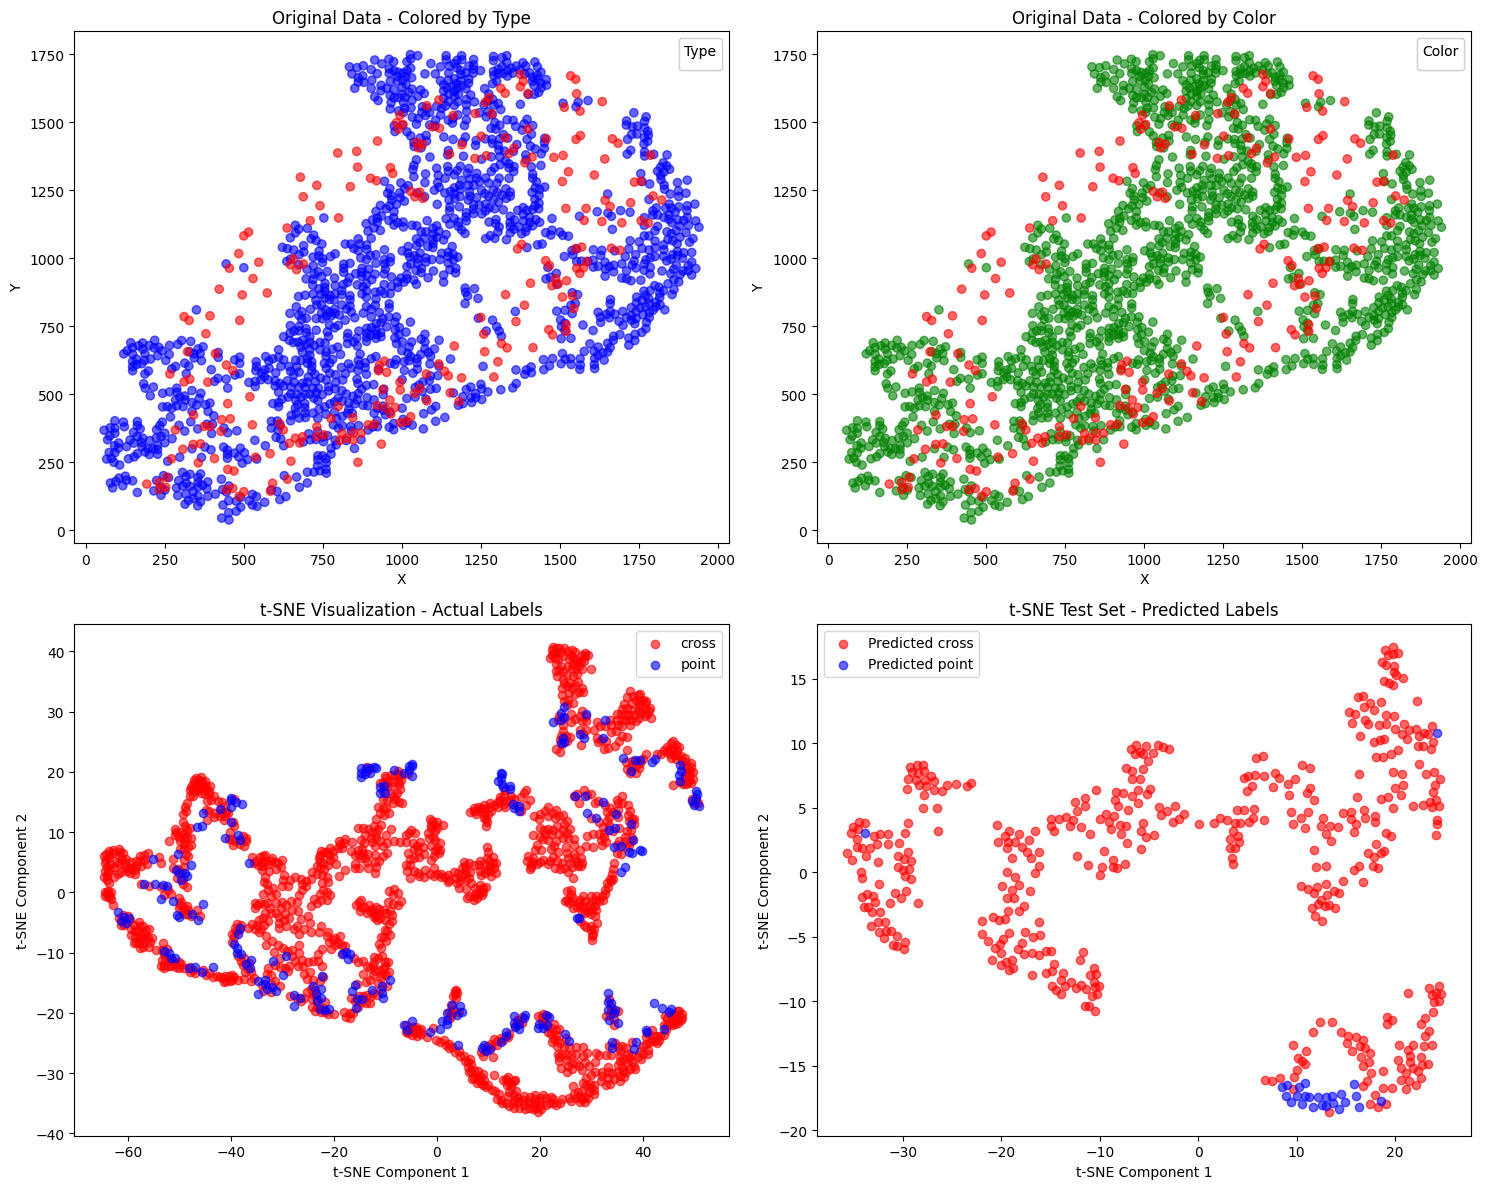

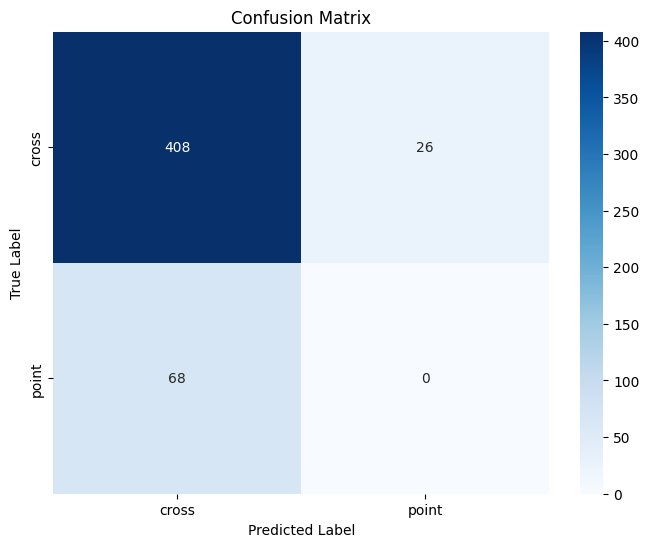


DETAILED RESULTS SUMMARY
Total samples: 1672
Training samples: 1170
Testing samples: 502
Model Accuracy: 0.8127

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Feature importances from t-SNE components:
  t-SNE Component 1: 0.4802
  t-SNE Component 2: 0.5198


In [18]:
# Load the data
df = pd.read_csv('df_red_green_overlay.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nValue counts for Type:")
print(df['Type'].value_counts())
print("\nValue counts for Color:")
print(df['Color'].value_counts())

# Prepare features and labels
X = df[['X', 'Y']].values
y = df['Type'].values  # We'll classify 'circle' vs 'cross'

print(f"\nFeatures shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Apply t-SNE for dimensionality reduction and visualization
print("\nApplying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Split t-SNE results for train and test
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Train a classifier on t-SNE features
print("\nTraining classifier on t-SNE features...")
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tsne, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tsne)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Original data colored by Type
scatter1 = axes[0,0].scatter(df['X'], df['Y'], c=df['Type'].map({'cross': 'blue', 'point': 'red'}), alpha=0.6)
axes[0,0].set_title('Original Data - Colored by Type')
axes[0,0].set_xlabel('X')
axes[0,0].set_ylabel('Y')
legend1 = axes[0,0].legend(*scatter1.legend_elements(), title='Type')
axes[0,0].add_artist(legend1)

# Plot 2: Original data colored by Color
scatter2 = axes[0,1].scatter(df['X'], df['Y'], c=df['Color'].map({'light_green': 'green', 'red': 'red'}), alpha=0.6)
axes[0,1].set_title('Original Data - Colored by Color')
axes[0,1].set_xlabel('X')
axes[0,1].set_ylabel('Y')
legend2 = axes[0,1].legend(*scatter2.legend_elements(), title='Color')
axes[0,1].add_artist(legend2)

# Plot 3: t-SNE visualization colored by actual labels
unique_labels = np.unique(y)
colors = ['red', 'blue']
for i, label in enumerate(unique_labels):
    mask = y == label
    axes[1,0].scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                     c=colors[i], label=label, alpha=0.6)
axes[1,0].set_title('t-SNE Visualization - Actual Labels')
axes[1,0].set_xlabel('t-SNE Component 1')
axes[1,0].set_ylabel('t-SNE Component 2')
axes[1,0].legend()

# Plot 4: t-SNE visualization colored by predicted labels (test set only)
test_indices = range(len(X_test_tsne))
for i, label in enumerate(unique_labels):
    mask = y_pred == label
    axes[1,1].scatter(X_test_tsne[mask, 0], X_test_tsne[mask, 1],
                     c=colors[i], label=f'Predicted {label}', alpha=0.6)
axes[1,1].set_title('t-SNE Test Set - Predicted Labels')
axes[1,1].set_xlabel('t-SNE Component 1')
axes[1,1].set_ylabel('t-SNE Component 2')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Detailed confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print detailed results
print("\n" + "="*50)
print("DETAILED RESULTS SUMMARY")
print("="*50)
print(f"Total samples: {len(df)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Model Accuracy: {accuracy:.4f}")

# Calculate precision, recall, F1-score from confusion matrix
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Feature importance (if using tree-based classifier)
if hasattr(classifier, 'feature_importances_'):
    print(f"\nFeature importances from t-SNE components:")
    for i, importance in enumerate(classifier.feature_importances_):
        print(f"  t-SNE Component {i+1}: {importance:.4f}")

In [22]:
from time import time
import numpy as np
from sklearn import manifold
from matplotlib.ticker import NullFormatter


circles, perplexity=3 in 3.9 sec
circles, perplexity=5 in 4.3 sec
circles, perplexity=7 in 3 sec
circles, perplexity=10 in 3 sec
circles, perplexity=20 in 3.5 sec
circles, perplexity=30 in 6.8 sec
circles, perplexity=40 in 5.2 sec


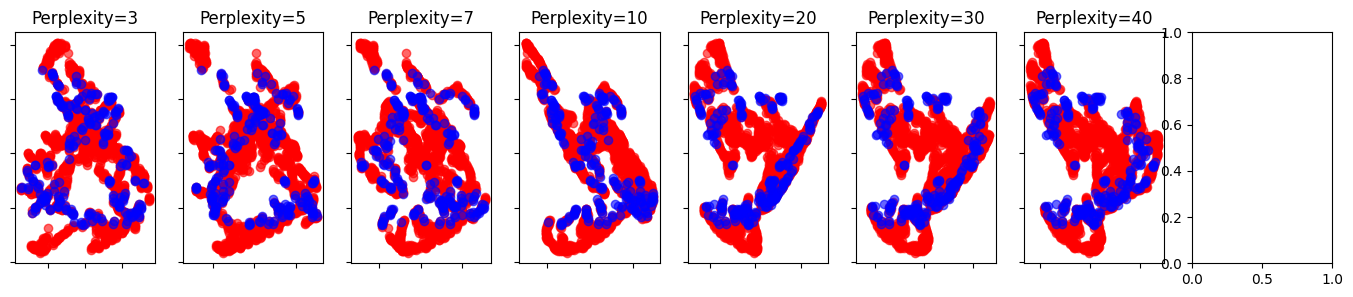

In [25]:
n_components = 2
perplexities = [3, 5, 7, 10, 20, 30, 40]


(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(17, 3))


for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    X_tsne_perplx = tsne.fit_transform(X/np.std(X))
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)

    unique_labels = np.unique(y)
    colors = ['red', 'blue']
    for i, label in enumerate(unique_labels):
      mask = y == label
      ax.scatter(X_tsne_perplx[mask, 0], X_tsne[mask, 1],
                 c=colors[i], label=label, alpha=0.6)

    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Graph representation

In [26]:
import networkx as nx
from sklearn.neighbors import NearestNeighbors

In [27]:

# Load the data
df = pd.read_csv('df_red_green_overlay.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nValue counts for Color:")
print(df['Color'].value_counts())
print("\nValue counts for Type:")
print(df['Type'].value_counts())

# Create graph
G = nx.Graph()

# Add nodes with attributes
for idx, row in df.iterrows():
    G.add_node(idx,
              pos=(row['X'], row['Y']),
              color=row['Color'],
              type=row['Type'],
              x=row['X'],
              y=row['Y'])

print(f"\nGraph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Dataset shape: (1672, 4)

First few rows:
     X   Y        Color   Type
0  453  37  light_green  cross
1  430  44  light_green  cross
2  452  64  light_green  cross
3  476  69  light_green  cross
4  490  84  light_green  cross

Value counts for Color:
Color
light_green    1445
red             227
Name: count, dtype: int64

Value counts for Type:
Type
cross    1445
point     227
Name: count, dtype: int64

Graph created with 1672 nodes and 0 edges


In [28]:


# Method 2: Additional connections based on same type (optional)
print("Adding connections based on type similarity...")
same_type_edges = 0
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i]['Type'] == df.iloc[j]['Type'] and not G.has_edge(i, j):
            # Only add if within a reasonable distance
            dist = np.sqrt((df.iloc[i]['X'] - df.iloc[j]['X'])**2 +
                         (df.iloc[i]['Y'] - df.iloc[j]['Y'])**2)
            if dist < 100:  # Distance threshold
                G.add_edge(i, j, weight=dist, type_based=True)
                same_type_edges += 1

print(f"Added {same_type_edges} type-based edges")
print(f"Total edges: {G.number_of_edges()}")

# Basic graph statistics
print("\nGraph Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

# Node attributes summary
color_counts = {}
type_counts = {}
for node in G.nodes():
    color = G.nodes[node]['color']
    node_type = G.nodes[node]['type']
    color_counts[color] = color_counts.get(color, 0) + 1
    type_counts[node_type] = type_counts.get(node_type, 0) + 1

print(f"\nNode colors: {color_counts}")
print(f"Node types: {type_counts}")

Adding connections based on type similarity...
Added 21951 type-based edges
Total edges: 21951

Graph Statistics:
Number of nodes: 1672
Number of edges: 21951
Average degree: 26.26

Node colors: {'light_green': 1445, 'red': 227}
Node types: {'cross': 1445, 'point': 227}


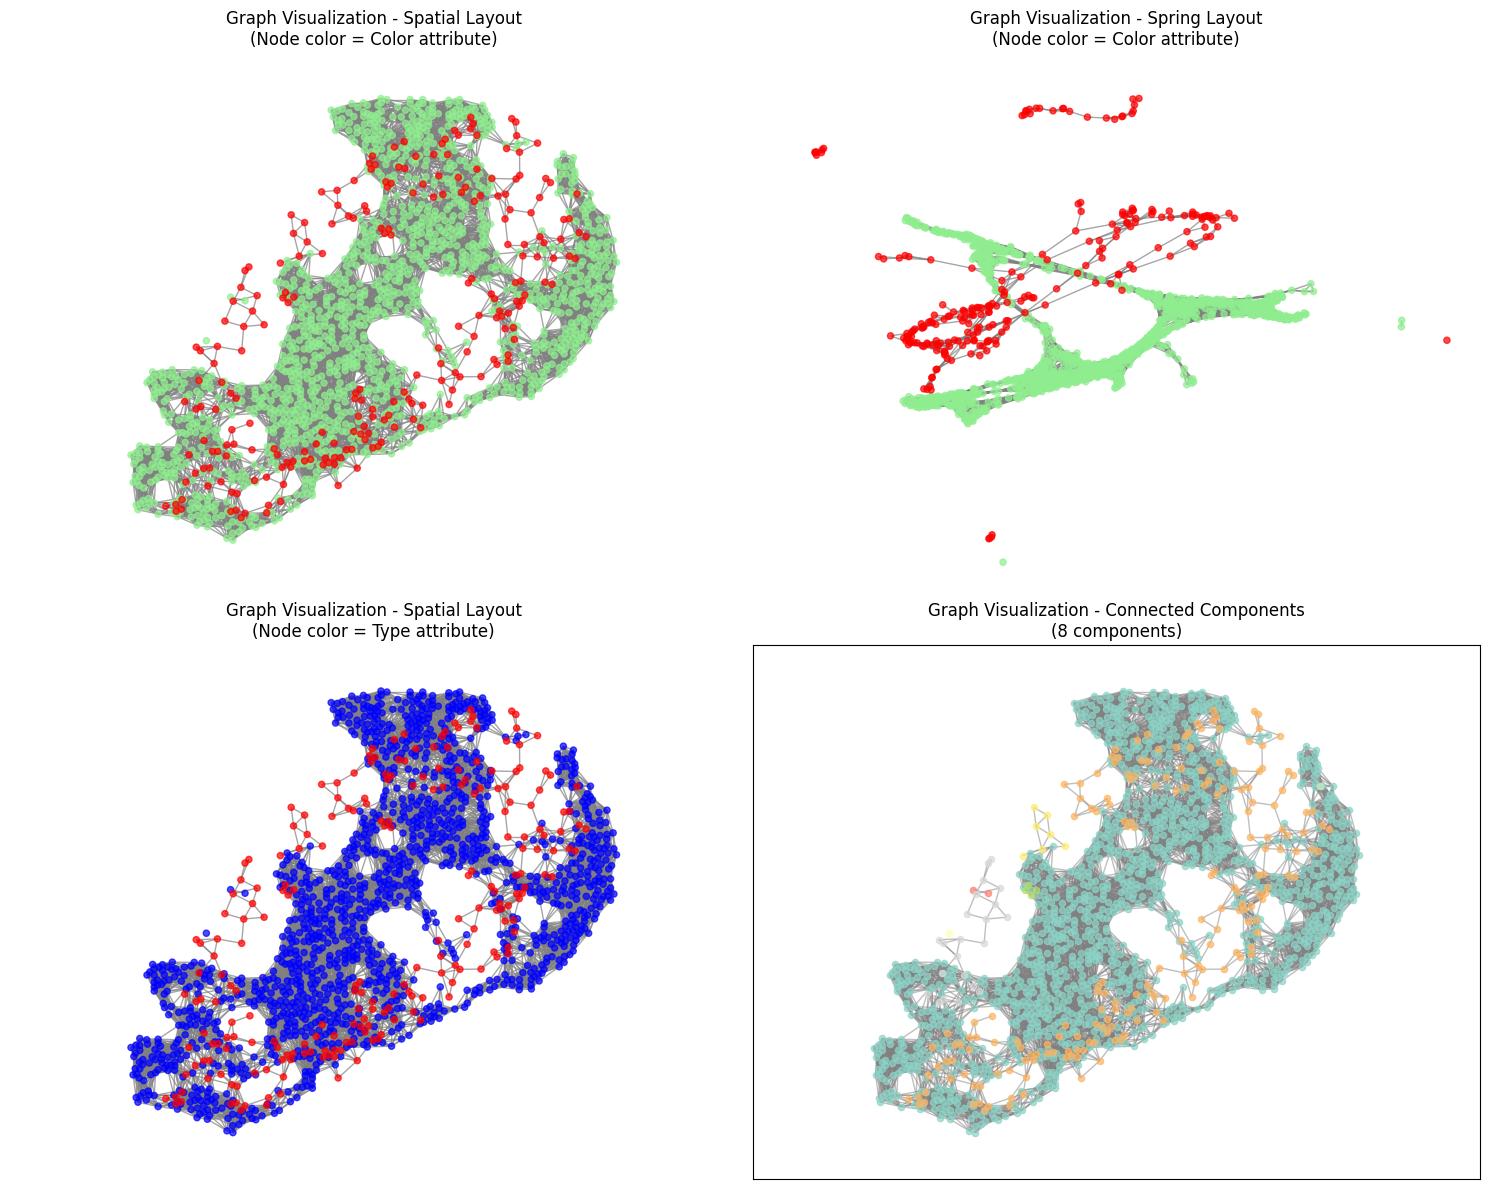


GRAPH ANALYSIS
Number of connected components: 8
Component sizes: [1442, 1, 2, 193, 4, 22, 1, 7]
Largest component size: 1442
Smallest component size: 1

Degree statistics:
  Max degree: 56
  Min degree: 0
  Average degree: 26.26

Color-based analysis:
  light_green: 1445 nodes, avg degree: 29.54
  red: 227 nodes, avg degree: 5.33

Type-based analysis:
  cross: 1445 nodes, avg degree: 29.54
  point: 227 nodes, avg degree: 5.33


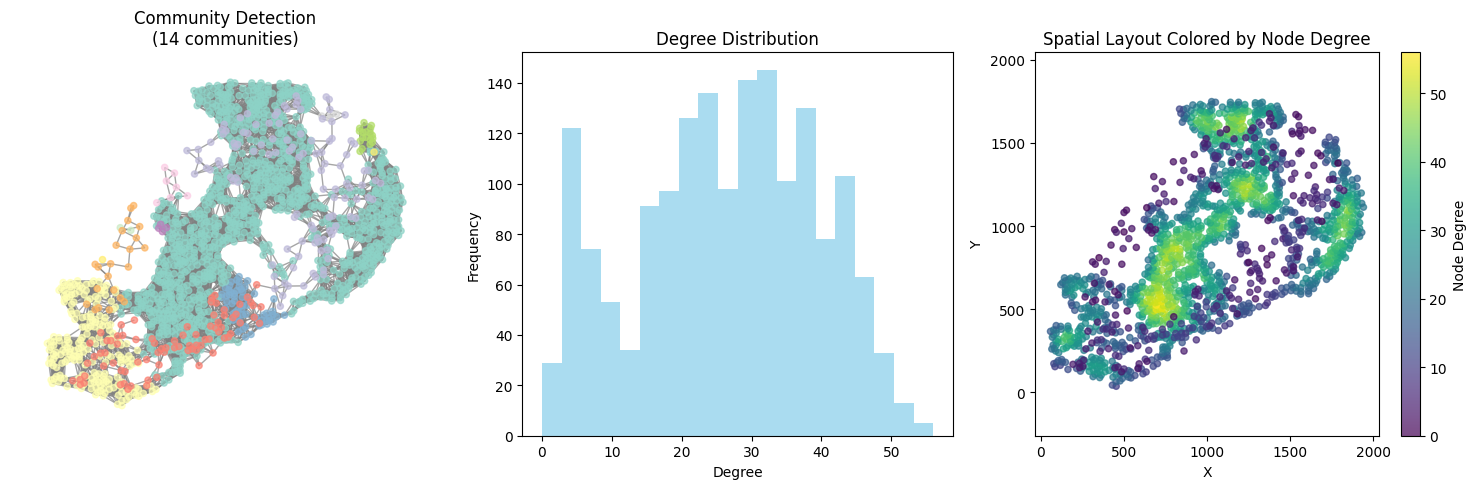


Graph exported with 1672 nodes and 21951 edges
Node attributes: pos, color, type, x, y
Edge attributes: weight, type_based (for some edges)


In [29]:



# Visualization 1: Basic graph layout
plt.figure(figsize=(15, 12))

# Get node colors for plotting
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
# Map color names to actual colors
color_map = {'light_green': 'lightgreen', 'red': 'red'}
mapped_colors = [color_map[color] for color in node_colors]

# Get positions from node attributes
pos = {node: (G.nodes[node]['x'], G.nodes[node]['y']) for node in G.nodes()}

plt.subplot(2, 2, 1)
nx.draw(G, pos, node_color=mapped_colors, node_size=20,
       edge_color='gray', alpha=0.7, with_labels=False)
plt.title('Graph Visualization - Spatial Layout\n(Node color = Color attribute)')
plt.axis('equal')

# Visualization 2: Spring layout
plt.subplot(2, 2, 2)
spring_pos = nx.spring_layout(G, k=0.3, iterations=50)
nx.draw(G, spring_pos, node_color=mapped_colors, node_size=20,
       edge_color='gray', alpha=0.7, with_labels=False)
plt.title('Graph Visualization - Spring Layout\n(Node color = Color attribute)')

# Visualization 3: Color by Type
plt.subplot(2, 2, 3)
type_colors = ['blue' if G.nodes[node]['type'] == 'cross' else 'red' for node in G.nodes()]
nx.draw(G, pos, node_color=type_colors, node_size=20,
       edge_color='gray', alpha=0.7, with_labels=False)
plt.title('Graph Visualization - Spatial Layout\n(Node color = Type attribute)')
plt.axis('equal')

# Visualization 4: Highlight connected components
plt.subplot(2, 2, 4)
connected_components = list(nx.connected_components(G))
colors = plt.cm.Set3(np.linspace(0, 1, len(connected_components)))

for i, component in enumerate(connected_components):
    nx.draw_networkx_nodes(G, pos, nodelist=list(component),
                          node_color=[colors[i]], node_size=20, alpha=0.7)

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
plt.title(f'Graph Visualization - Connected Components\n({len(connected_components)} components)')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Additional analysis
print("\n" + "="*50)
print("GRAPH ANALYSIS")
print("="*50)

# Connected components analysis
print(f"Number of connected components: {len(connected_components)}")
component_sizes = [len(comp) for comp in connected_components]
print(f"Component sizes: {component_sizes}")
print(f"Largest component size: {max(component_sizes)}")
print(f"Smallest component size: {min(component_sizes)}")

# Degree analysis
degrees = [degree for node, degree in G.degree()]
print(f"\nDegree statistics:")
print(f"  Max degree: {max(degrees)}")
print(f"  Min degree: {min(degrees)}")
print(f"  Average degree: {np.mean(degrees):.2f}")

# Color-based analysis
print(f"\nColor-based analysis:")
for color in ['light_green', 'red']:
    color_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == color]
    avg_degree = np.mean([G.degree(node) for node in color_nodes])
    print(f"  {color}: {len(color_nodes)} nodes, avg degree: {avg_degree:.2f}")

# Type-based analysis
print(f"\nType-based analysis:")
for node_type in ['cross', 'point']:
    type_nodes = [node for node in G.nodes() if G.nodes[node]['type'] == node_type]
    avg_degree = np.mean([G.degree(node) for node in type_nodes])
    print(f"  {node_type}: {len(type_nodes)} nodes, avg degree: {avg_degree:.2f}")

# Advanced visualization: Community detection
plt.figure(figsize=(15, 5))

# Try to detect communities
try:
    from networkx.algorithms import community

    # Use greedy modularity communities
    communities = community.greedy_modularity_communities(G)

    plt.subplot(1, 3, 1)
    # Color nodes by community
    community_colors = []
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_colors.append(i)
                break

    nx.draw(G, pos, node_color=community_colors, node_size=20,
           cmap=plt.cm.Set3, edge_color='gray', alpha=0.7, with_labels=False)
    plt.title(f'Community Detection\n({len(communities)} communities)')
    plt.axis('equal')

except ImportError:
    print("Community detection requires additional packages")

# Degree distribution
plt.subplot(1, 3, 2)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=20, alpha=0.7, color='skyblue')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')

# Node attributes visualization
plt.subplot(1, 3, 3)
# Scatter plot of original coordinates colored by graph degree
node_degrees = [G.degree(node) for node in G.nodes()]
scatter = plt.scatter(df['X'], df['Y'], c=node_degrees, cmap='viridis',
                    alpha=0.7, s=20)
plt.colorbar(scatter, label='Node Degree')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spatial Layout Colored by Node Degree')
plt.axis('equal')

plt.tight_layout()
plt.show()

# Export graph for further analysis (optional)
print(f"\nGraph exported with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
print("Node attributes: pos, color, type, x, y")
print("Edge attributes: weight, type_based (for some edges)")

# Graph clustering with Gromov Wasserstein Distance

https://github.com/trneedham/Spectral-Gromov-Wasserstein